In [1]:
import pandas as pd

(link to dataset)[https://dataverse.harvard.edu/dataset.xhtml?id=3047332]

In [2]:
tweets_df = pd.read_csv('./top-20-tweets-2017.csv')

In [3]:
tweets_df.shape

(52542, 10)

In [4]:
tweets_df.dtypes

author               object
content              object
country              object
date_time            object
id                  float64
language             object
latitude            float64
longitude           float64
number_of_likes       int64
number_of_shares      int64
dtype: object

In [5]:
print(
    tweets_df.date_time.min()
    , tweets_df.date_time.max()
)

01/01/2011 02:16 31/12/2016 23:59


In [6]:
tweets_df.sample(10)

author                                            content  \
11771        rihanna  Day 1 niggaz they stuck wit me tho http://t.co...   
48455      instagram  Happy birthday to the one and only @Beyonce! 👑...   
35699    selenagomez                     @SoaringAriana thank you! xoxo   
38912         cnnbrk  Man who killed himself after Munich shootings ...   
28917  KimKardashian  Can you guys guess? Tune in tonight to find ou...   
11273        rihanna  Just left the studio... Recorded a #monster ho...   
49720      instagram  Simplicity = key for jewelry designer Nathalis...   
15442        YouTube  This makes us wanna visit Philly 4 real. https...   
48944      instagram  .@aidan turned his childhood passion into a ca...   
32668      Cristiano  You asked: Podrias mandarme saludos a Almeria ...   

      country         date_time            id language  latitude  longitude  \
11771     NaN  11/05/2013 00:27  3.330150e+17       en       NaN        NaN   
48455     NaN  04/09/2016 14:00  7.724340e+17       en       NaN        NaN   
35699     NaN  08/05/2013 01:10  3.319390e+17       en       NaN        NaN   
38912     NaN  22/07/2016 23:44  7.566360e+17       en       NaN        NaN   
28917     NaN  31/05/2015 20:38  6.051110e+17       en       NaN        NaN   
11273     NaN  11/09/2013 19:52  3.778820e+17       en       NaN        NaN   
49720     NaN  15/03/2016 19:00  7.098170e+17       en       NaN        NaN   
15442     NaN  30/01/2016 01:00  6.932370e+17       en       NaN        NaN   
48944     NaN  25/06/2016 00:30  7.465010e+17       en       NaN        NaN   
32668     NaN  31/03/2014 14:37  4.506430e+17       es       NaN        NaN   

       number_of_likes  number_of_shares  
11771              753              1057  
48455             2279               924  
35699              772               822  
38912              356               488  
28917             2695               555  
11273             6111              9126  
49720             1195               235  
15442             1332               229  
48944             1071               187  
32668             1283               729

In [7]:
tweets_df.author.unique()

array(['katyperry', 'justinbieber', 'taylorswift13', 'BarackObama',
       'rihanna', 'YouTube', 'ladygaga', 'TheEllenShow', 'Twitter',
       'jtimberlake', 'KimKardashian', 'britneyspears', 'Cristiano',
       'selenagomez', 'cnnbrk', 'jimmyfallon', 'ArianaGrande', 'shakira',
       'instagram', 'ddlovato'], dtype=object)

In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [9]:
sample_tweets = tweets_df.content.sample(1000).values
sample_scores = []
for tweet in sample_tweets:
    sample_scores.append(analyser.polarity_scores(tweet))
    
df = pd.DataFrame(data = {'tweet': sample_tweets, 'vader_score': sample_scores})
df['sample_compound_score'] = df.vader_score.apply(lambda x: x['compound'])
    

In [10]:
tweets_df['vader_score'] = tweets_df.content.apply(lambda x: analyser.polarity_scores(x))

In [11]:
tweets_df['compound_score'] = tweets_df.vader_score.apply(lambda x: x['compound'])
tweets_df['datetime'] = pd.to_datetime(tweets_df.date_time)
    

In [12]:
import seaborn as sns


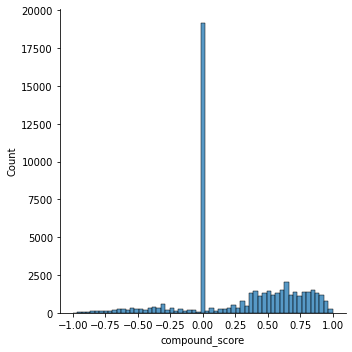

In [13]:
# distribution of compound_score
sns.displot(tweets_df.compound_score)

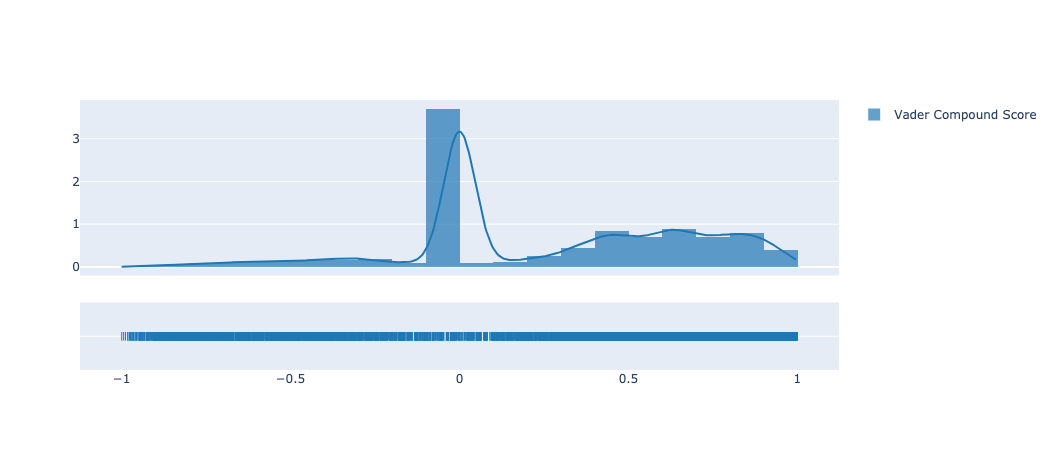

In [22]:
import plotly.figure_factory as ff


fig = ff.create_distplot([tweets_df['compound_score']], ['Vader Compound Score'], bin_size=0.1)
fig.show()

<AxesSubplot:xlabel='datetime', ylabel='compound_score'>

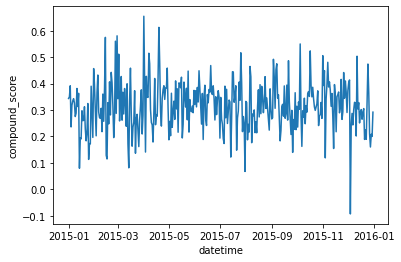

In [26]:
sentiment_by_day = tweets_df[tweets_df.datetime.dt.year==2015].groupby(tweets_df.datetime.dt.date).agg(
    {'compound_score': 'mean'}
)

sns.lineplot(data=sentiment_by_day, x="datetime", y="compound_score")

In [36]:
sentiment_by_day.index.values

array([datetime.date(2015, 1, 1), datetime.date(2015, 1, 2),
       datetime.date(2015, 1, 3), datetime.date(2015, 1, 4),
       datetime.date(2015, 1, 5), datetime.date(2015, 1, 6),
       datetime.date(2015, 1, 7), datetime.date(2015, 1, 8),
       datetime.date(2015, 1, 9), datetime.date(2015, 1, 10),
       datetime.date(2015, 1, 11), datetime.date(2015, 1, 12),
       datetime.date(2015, 1, 13), datetime.date(2015, 1, 14),
       datetime.date(2015, 1, 15), datetime.date(2015, 1, 16),
       datetime.date(2015, 1, 17), datetime.date(2015, 1, 18),
       datetime.date(2015, 1, 19), datetime.date(2015, 1, 20),
       datetime.date(2015, 1, 21), datetime.date(2015, 1, 22),
       datetime.date(2015, 1, 23), datetime.date(2015, 1, 24),
       datetime.date(2015, 1, 25), datetime.date(2015, 1, 26),
       datetime.date(2015, 1, 27), datetime.date(2015, 1, 28),
       datetime.date(2015, 1, 29), datetime.date(2015, 1, 30),
       datetime.date(2015, 1, 31), datetime.date(2015, 2, 1),
  

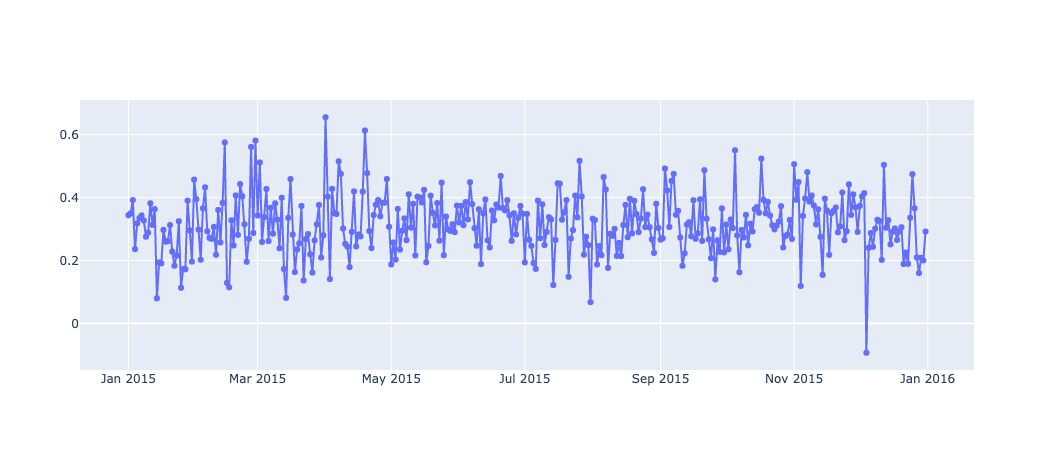

In [39]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x = sentiment_by_day.index.values
        , y = sentiment_by_day.compound_score
        , mode = 'lines+markers'
        , name = 'Avg Compound Score'
    )
)

fig.show()

[tutorial notes](http://docs.tweepy.org/en/latest/getting_started.html)

In [15]:
import os
import yaml
import tweepy

In [16]:
# api creds
creds = yaml.load(
    open(os.path.expanduser('~/.twitter/creds.yml')), 
    Loader=yaml.FullLoader)

In [17]:
# api auth
auth = tweepy.OAuthHandler(
    consumer_key=creds['api-key'], 
    consumer_secret=creds['api-secret']
)

auth.set_access_token(
    key=creds['access-token'], 
    secret=creds['access-token-secret']
)

api = tweepy.API(auth)

In [18]:
public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.text)

The manager exploded after his team conceded a late equalizer 😡

(via @Emishor)
https://t.co/2I1Xkd7iwY
A volunteer at Big Cat Rescue, an animal sanctuary featured in the Netflix documentary Tiger King, was severely inj… https://t.co/LFpoACNN6c
https://t.co/6cc5UEDQ1R’s payment terminal is faster, easier and cheaper than paying with @Visa, @Mastercard, or… https://t.co/8smNbpYHqz
Companies including Philip Morris and Sealed Air could lose out if the Biden administration repeals or revises a co… https://t.co/2AXlUK0e30
Why one Republican election official in Georgia is speaking out against President Trump’s baseless claims of voting… https://t.co/jNk9LI6q70
PMT 12-7 

-NFL Week 13 
-Fastest 2 Min &amp; Recap of Every game
-Browns fans have their day 
-Matt Nagy should be fir… https://t.co/T3ywBcph21
Glynn’s Take: Australia’s economy is throwing off the Covid downturn https://t.co/NrhNsvtde8
🙏🙏🙏 https://t.co/sj6rvkfISc
China is increasingly flouting international sanctions on North Korea

In [19]:
user = api.get_user('ravedappeport')
user

User(_api=<tweepy.api.API object at 0x12b2cb828>, _json={'id': 491393897, 'id_str': '491393897', 'name': 'Dave Rappeport', 'screen_name': 'RaveDappeport', 'location': '', 'profile_location': None, 'description': 'percolating and proliferating nonsense', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 5, 'friends_count': 54, 'listed_count': 0, 'created_at': 'Mon Feb 13 15:53:21 +0000 2012', 'favourites_count': 4, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 8, 'lang': None, 'status': {'created_at': 'Sun Feb 17 02:39:30 +0000 2013', 'id': 302970499300982784, 'id_str': '302970499300982784', 'text': 'Great speeches are a quality of great men #devries', 'truncated': False, 'entities': {'hashtags': [{'text': 'devries', 'indices': [42, 50]}], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="http://www.apple.com" rel="nofollow">iOS</a>', 'in_reply_to_status_id': None, 'in_rep